<a href="https://colab.research.google.com/github/mostlydipo/AI-Data-science/blob/main/Country_data_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Data processing(files)
import numpy as np # Mathematics computation
import matplotlib.pyplot as plt # Plots and graphs

# Sklearn library for machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cd=pd.read_csv('country_data.csv') # Extract data.
cd.head() # First 5 rows of the data.

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
cdd = cd.drop('country', axis=1) #Drop country column because(non-numeric) amd not needed for cluster.

In [ ]:
scaler = MinMaxScaler() # Transforms numeric feature data to range 0 to 1.
 
cds = scaler.fit_transform(cdd.to_numpy())
cds = pd.DataFrame(cds, columns=[
    'child_mort',	'exports',	'health',	'imports',	'income',	'inflation',	'life_expec',	'total_fer',	'gdpp'])
 
print("Scaled Dataset Using MinMaxScaler")
cds.head()

Scaled Dataset Using MinMaxScaler


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


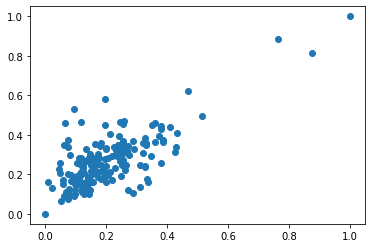

In [ ]:
plt.scatter(cds['exports'], cds['imports']) # Extract two opposing variables

In [ ]:
k_rng = range(1,10) # Clustering model
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cd[['exports', 'imports']])
    sse.append(km.inertia_)

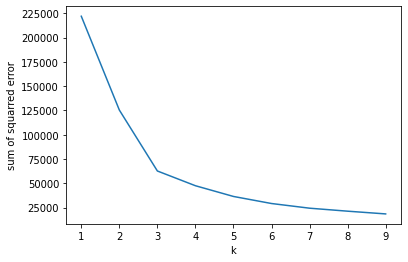

In [ ]:
plt.xlabel('k') # Elbow method to find the perfect number of clusterm = 3
plt.ylabel('sum of squarred error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predict = km.fit_predict(cds[['exports', 'imports']]) # Cluster predictions
y_predict

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2], dtype=int32)

In [ ]:
cds['cluster1']= y_predict # Cluster groupings
cds.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,2
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,2
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,1


Text(0, 0.5, 'imports')

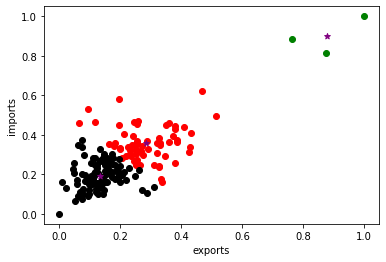

In [ ]:
df1 = cds[cds.cluster1==0] # Visualization of clusters and centroids
df2 = cds[cds.cluster1==1]
df3 = cds[cds.cluster1==2]

plt.scatter(df1.exports, df1['imports'], color= 'green')
plt.scatter(df2.exports, df2['imports'], color= 'red')
plt.scatter(df3.exports, df3['imports'], color= 'black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color ='purple', marker= '*', label= 'centroid')

plt.xlabel ('exports')
plt.ylabel('imports')

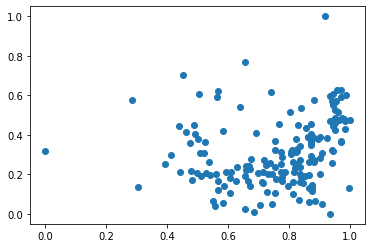

In [ ]:
plt.scatter(cds['life_expec'], cds['health']) # Extract two opposing variables

In [ ]:
k_rng = range(1,10)  # Clustering model
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cd[['life_expec', 'health']])
    sse.append(km.inertia_)

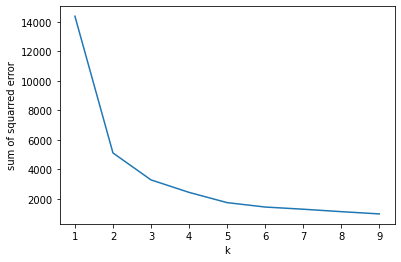

In [ ]:
plt.xlabel('k')  # Elbow method to find the perfect number of clusterm = 2
plt.ylabel('sum of squarred error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [ ]:
y_predict = km.fit_predict(cds[['life_expec', 'health']]) # Cluster predictions
y_predict

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

In [ ]:
cds['cluster2']= y_predict # Clusters grouping
cds.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,0,0
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0,1
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2,0
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,2,1


Text(0, 0.5, 'health')

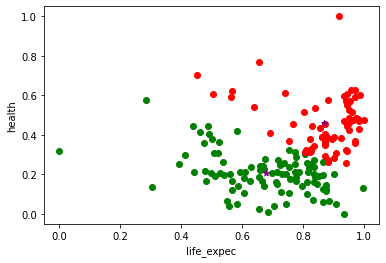

In [ ]:
df4 = cds[cds.cluster2==0] # Visualization of cluster and centroids
df5 = cds[cds.cluster2==1]

plt.scatter(df4.life_expec, df4['health'], color= 'green')
plt.scatter(df5.life_expec, df5['health'], color= 'red')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color ='purple', marker= '*', label= 'centroid')

plt.xlabel ('life_expec')
plt.ylabel('health')

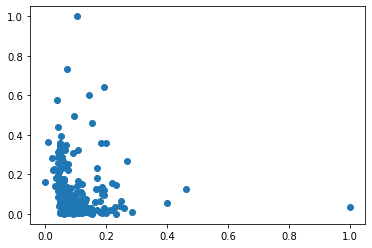

In [ ]:
plt.scatter(cds['inflation'], cds['income'])  # Extract two opposing variables

In [ ]:
k_rng = range(1,10)  # Clustering model
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cd[['inflation', 'income']])
    sse.append(km.inertia_)

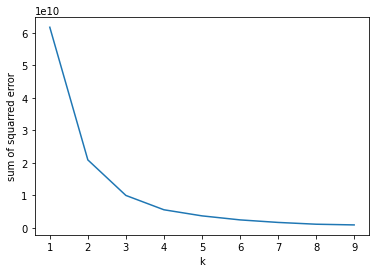

In [ ]:
plt.xlabel('k') # Elbow method to find the perfect number of clusterm = 2
plt.ylabel('sum of squarred error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [ ]:
y_predict = km.fit_predict(cds[['inflation', 'income']])  # Cluster predictions
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
cds['cluster3']= y_predict # Clusters grouping
cds.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2,cluster3
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,0,0,0
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0,1,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0,0,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2,0,0
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,2,1,0


Text(0, 0.5, 'income')

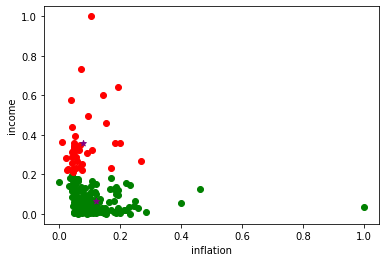

In [ ]:
df7 = cds[cds.cluster3==0] # Visualization of cluster and centroids
df8 = cds[cds.cluster3==1]

plt.scatter(df7.inflation, df7['income'], color= 'green')
plt.scatter(df8.inflation, df8['income'], color= 'red')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color ='purple', marker= '*', label= 'centroid')

plt.xlabel ('inflation')
plt.ylabel('income')

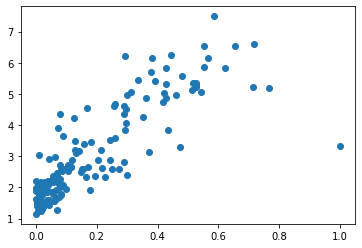

In [ ]:
plt.scatter(cds['child_mort'], cd['total_fer']) # Extract two opposing variables

In [ ]:
k_rng = range(1,10) # Clustering model
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cd[['child_mort', 'total_fer']])
    sse.append(km.inertia_)

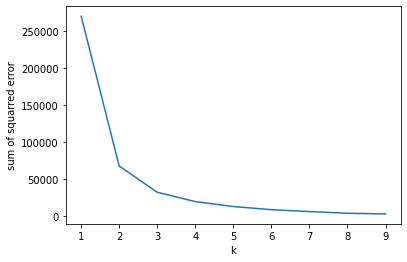

In [ ]:
plt.xlabel('k')  # Elbow method to find the perfect number of clusterm = 2
plt.ylabel('sum of squarred error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [ ]:
y_predict = km.fit_predict(cds[['child_mort', 'total_fer']])
y_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
cds['cluster4']= y_predict  # Cluster predictions
cds.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster1,cluster2,cluster3,cluster4
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,0,0,0,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0,1,0,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0,0,0,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2,0,0,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,2,1,0,0


Text(0, 0.5, 'total_fer')

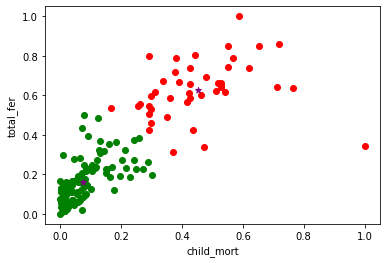

In [ ]:
df9 = cds[cds.cluster4==0] # Visualization of cluster and centroids
df10 = cds[cds.cluster4==1]

plt.scatter(df9.child_mort, df9['total_fer'], color= 'green')
plt.scatter(df10.child_mort, df10['total_fer'], color= 'red')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color ='purple', marker= '*', label= 'centroid')

plt.xlabel ('child_mort')
plt.ylabel('total_fer')